In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

----
# 1. Loading and Parsing Data

In [14]:
df = pd.read_csv('RLtest.csv', usecols=[1,2])

head() to see what the data looks like

In [15]:
df.head()

,host,class
0,boqaypuwee.yi.org,dga
1,fotoev.com,legit
2,quickfever.com,legit
3,weareplaystation.fr,legit
4,bxorruxhlkcb.pw,dga


In [16]:
N = df.shape[0]
P = df.shape[1]

print('Data has {} rows, {} columns'.format(N, P))

Data has 10000 rows, 2 columns


In [17]:
df.dtypes

host     object
class    object
dtype: object

In [18]:
list(df)

['host', 'class']

In [19]:
def get_domain(host):
    fullstr = host.split('.')
    domain = fullstr[0]
    return domain

df['domain'] = df['host'].apply(get_domain)
df['domain'][0:5]

0          boqaypuwee
1              fotoev
2          quickfever
3    weareplaystation
4        bxorruxhlkcb
Name: domain, dtype: object

In [20]:
df[0:5]

,host,class,domain
0,boqaypuwee.yi.org,dga,boqaypuwee
1,fotoev.com,legit,fotoev
2,quickfever.com,legit,quickfever
3,weareplaystation.fr,legit,weareplaystation
4,bxorruxhlkcb.pw,dga,bxorruxhlkcb


In [21]:
df['class'].unique()

array(['dga', 'legit'], dtype=object)

In [22]:
df.describe()

,host,class,domain
count,10000,10000,10000
unique,9993,2,9986
top,secondhandhounds.org,legit,avon
freq,2,5715,2


### Read in the domains.csv data and print

In [23]:
df_test = pd.read_csv('domains.csv')
df_test.head()

,host,domain,class,subclass
0,000directory.com.ar,000directory,legit,legit
1,000webhost.com,000webhost,legit,legit
2,001fans.com,001fans,legit,legit
3,01-telecharger.com,01-telecharger,legit,legit
4,010shangpu.com,010shangpu,legit,legit


----
# 2. Creating some basic features with apply()

In [24]:
# create some features we think might help us figure out which domains are bad.

def string_length(s):
    length = len(s)
    return length

def string_number_count(s):
    numbers = sum(c.isdigit() for c in s)
    return numbers

def string_alpha_count(s):
    alpha = sum(c.isalpha() for c in s)
    return alpha

def others(s):
    numbers = sum(c.isdigit() for c in s)
    alpha = sum(c.isalpha() for c in s)
    others = len(s) - numbers - alpha
    return others

Use the apply function to create new feature columns

In [25]:
df['numbers'] = df['domain'].apply(string_number_count)
df['other_chars'] = df['domain'].apply(others)
df['alpha'] = df['domain'].apply(string_alpha_count)
df['length'] = df['domain'].apply(string_length)

In [26]:
df.head()

,host,class,domain,numbers,other_chars,alpha,length
0,boqaypuwee.yi.org,dga,boqaypuwee,0,0,10,10
1,fotoev.com,legit,fotoev,0,0,6,6
2,quickfever.com,legit,quickfever,0,0,10,10
3,weareplaystation.fr,legit,weareplaystation,0,0,16,16
4,bxorruxhlkcb.pw,dga,bxorruxhlkcb,0,0,12,12


----
## Exercise: write a new feature function and use apply() to create a new column.

Check out some of the new columns

----
# 3. Explore the Data

In [27]:
df.describe()

,numbers,other_chars,alpha,length
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.45880,0.071100,12.669000,13.198900
std,2.11829,0.305703,5.444043,5.968878
min,0.00000,0.000000,0.000000,1.000000
25%,0.00000,0.000000,8.000000,9.000000
50%,0.00000,0.000000,12.000000,12.000000
75%,0.00000,0.000000,16.000000,17.000000
max,25.00000,5.000000,40.000000,42.000000


Understand how your input variables are distributed

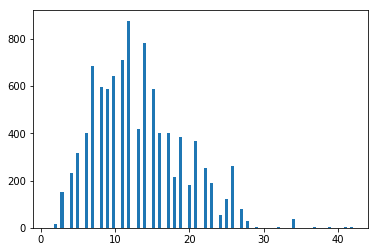

In [28]:
plt.hist(df['length'], bins=100)
plt.show()

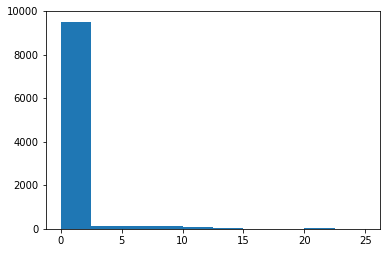

In [29]:
plt.hist(df['numbers'], bins=10)
plt.show()

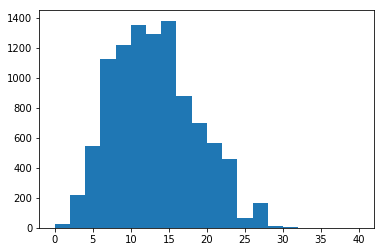

In [30]:
plt.hist(df['alpha'], bins=20)
plt.show()

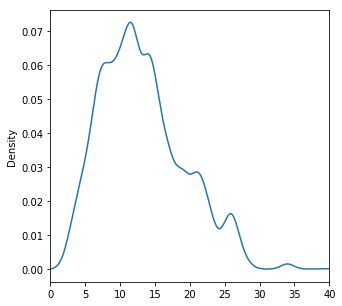

In [31]:
df['length'].plot(kind="density",
              figsize=(5,5), xlim=(0,40))

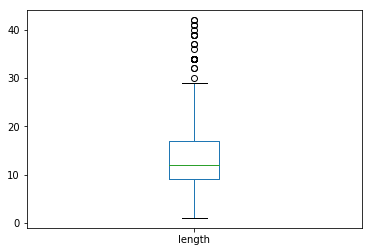

In [32]:
df['length'].plot(kind='box')

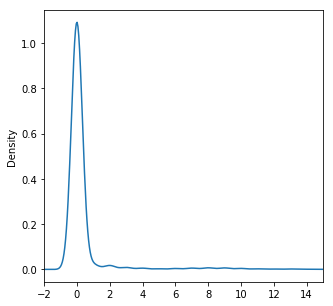

In [33]:
df['numbers'].plot(kind='density', figsize=(5,5), xlim=(-2,15))

In [34]:
def plot_ecdfs(data, fields, n=1000, prob_cutoff=0.01):
    '''plot empirical CDFs between probability range [prob_cutoff, 1.0-prob_cutoff]'''
    x = [(prob_cutoff + (1.0 - prob_cutoff * 2) * i / n) for i in range(n + 1)]
    nrows = np.ceil(len(fields) / 3)
    plt.figure(figsize=(16, 4 * nrows))
    for i, field in enumerate(fields):
        plt.subplot(nrows, 3, i + 1)
        plt.plot(data[field].quantile(x), x)
        plt.title(field)
        
def plot_hists(data, fields, bins=20, prob_cutoff=0.01):
    '''plot histograms for data whose empirical mass is in range [prob_cutoff, 1.0-prob_cutoff]'''
    nrows = np.ceil(len(fields) / 3)
    plt.figure(figsize=(16, 4 * nrows))
    for i, field in enumerate(fields):
        plt.subplot(nrows, 3, i + 1)
        min_val = data[field].quantile(prob_cutoff)
        max_val = data[field].quantile(1.0 - prob_cutoff)
        y = data[(data[field] >= min_val) & (data[field] <= max_val)][field]
        plt.hist(y, bins = bins)
        plt.title(field)

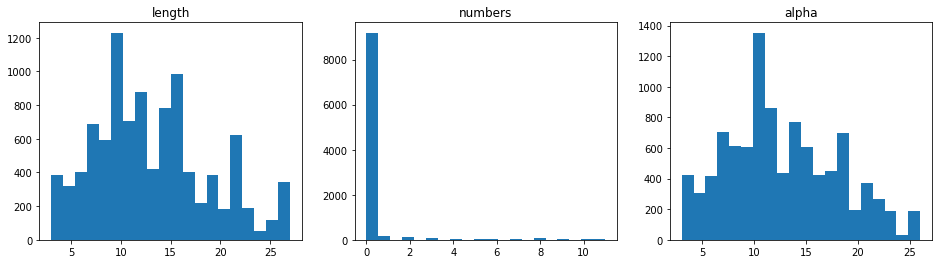

In [35]:
plot_hists(df, ['length', 'numbers', 'alpha'])

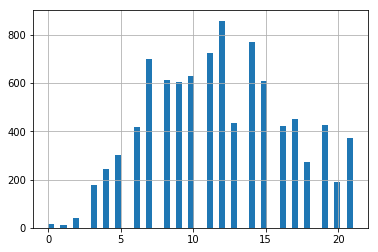

In [36]:
threshold = 0.90
threshold_val = df['alpha'].quantile(threshold)
df[df['alpha'] <= threshold_val]['alpha'].hist(bins=50)

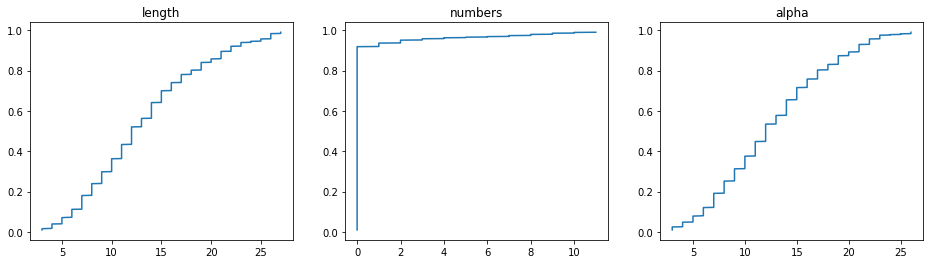

In [37]:
plot_ecdfs(df, ['length', 'numbers', 'alpha'])

----
## Exercise: plot the distribution of your new feature from the previous exercise

----
# 4. Try to predict badness using a simple separator

Encode Target Variable

In [39]:
def is_bad(string):
    if string == 'dga':
        return 1
    else:
        return 0

df['is_bad']=df['class'].apply(is_bad)
df_test['is_bad']=df_test['class'].apply(is_bad)

In [40]:
df.head()

,host,class,domain,numbers,other_chars,alpha,length,is_bad
0,boqaypuwee.yi.org,dga,boqaypuwee,0,0,10,10,1
1,fotoev.com,legit,fotoev,0,0,6,6,0
2,quickfever.com,legit,quickfever,0,0,10,10,0
3,weareplaystation.fr,legit,weareplaystation,0,0,16,16,0
4,bxorruxhlkcb.pw,dga,bxorruxhlkcb,0,0,12,12,1


In [41]:
pd.crosstab(df['is_bad'], df['numbers'])

numbers,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
is_bad,,,,,,,,,,,,,,,,,,,,,
0,5335,159,125,54,31,7,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3855,15,21,20,16,17,33,47,60,56,...,4,3,4,5,6,8,2,7,5,1


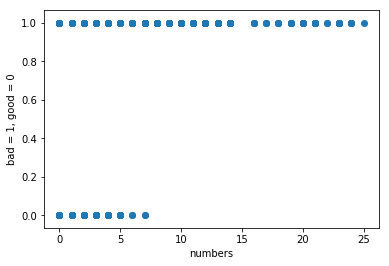

In [42]:
plt.scatter(df['numbers'],df['is_bad'])
plt.xlabel('numbers')
plt.ylabel('bad = 1, good = 0')
plt.show()

### Maybe numbers is a good separator, lets look at another variable

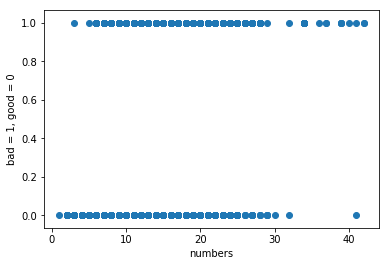

In [43]:
plt.scatter(df['length'],df['is_bad'])
plt.xlabel('numbers')
plt.ylabel('bad = 1, good = 0')
plt.show()

### What if we combine them?

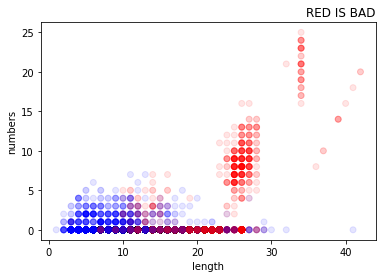

In [44]:
color= ['red' if c == 1 else 'blue' for c in df['is_bad']]
plt.scatter(df['length'],df['numbers'], color=color, alpha = .1)
plt.xlabel('length')
plt.ylabel('numbers')
plt.title('RED IS BAD',loc='right')
plt.show()


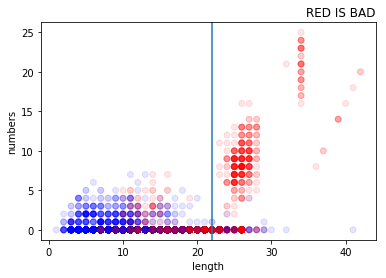

In [45]:
color= ['red' if c == 1 else 'blue' for c in df['is_bad']]
plt.scatter(df['length'],df['numbers'], color=color, alpha = .1)
plt.axvline(x=22)
plt.xlabel('length')
plt.ylabel('numbers')
plt.title('RED IS BAD',loc='right')
plt.show()


### Create a very simple model:

In [46]:
def separate(length):
    if length > 22:
        return 1
    else:
        return 0

df['model_1_pred']= df['length'].apply(separate)

In [47]:
y_pred = df['model_1_pred']
y_actual = df['is_bad']

from sklearn.metrics import accuracy_score

score = accuracy_score(y_actual, y_pred)
score

0.6378

#### Not so great...maybe we need some new features.

In [48]:
df= df.drop(['model_1_pred'], axis=1)